In [1]:
# import yfinance as yf
import time
# import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

In [13]:
df = yf.download('HDFCBANK.NS', start = '2020-01-01')
df


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
Date,,,,,
2020-01-01,1227.428711,1228.772705,1219.748882,1225.028764,1836849
2020-01-02,1235.252441,1236.452415,1227.812607,1227.812607,3068583
2020-01-03,1217.636963,1233.572585,1213.029018,1230.884598,5427775
2020-01-06,1191.285278,1211.300924,1186.533432,1209.572916,5445093
2020-01-07,1210.148926,1220.564670,1202.133128,1208.517009,7362247
...,...,...,...,...,...
2025-02-03,1678.000000,1686.800049,1663.449951,1670.000000,10138270
2025-02-04,1720.900024,1725.800049,1680.050049,1688.699951,14308251


In [14]:
df.columns = ['_'.join(col).strip() for col in df.columns.values]
df.columns = [col.split('_')[0] for col in df.columns]
df.tail(20)

,Close,High,Low,Open,Volume
Date,,,,,
2025-01-13,1630.849976,1646.750000,1624.300049,1640.000000,10834533
2025-01-14,1646.599976,1656.199951,1637.000000,1639.900024,13330716
2025-01-15,1643.050049,1662.699951,1636.300049,1656.500000,7011446
2025-01-16,1652.050049,1660.550049,1642.849976,1652.849976,10606227
2025-01-17,1636.750000,1650.500000,1628.500000,1643.500000,11556038
2025-01-20,1651.250000,1660.949951,1626.000000,1626.000000,8778809
2025-01-21,1642.400024,1661.050049,1633.050049,1658.250000,15579072
2025-01-22,1666.050049,1671.900024,1625.449951,1642.400024,15309653
2025-01-23,1664.900024,1687.000000,1651.250000,1687.000000,17454579


In [15]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()
df = df.reset_index()['close']
df

0       1227.428711
1       1235.252441
2       1217.636963
3       1191.285278
4       1210.148926
           ...     
1261    1678.000000
1262    1720.900024
1263    1737.800049
1264    1743.849976
1265    1732.750000
Name: close, Length: 1266, dtype: float64

In [16]:
df1 = pd.DataFrame(df).to_numpy()
actual_value =df1[-1][0]
actual_value

np.float64(1732.75)

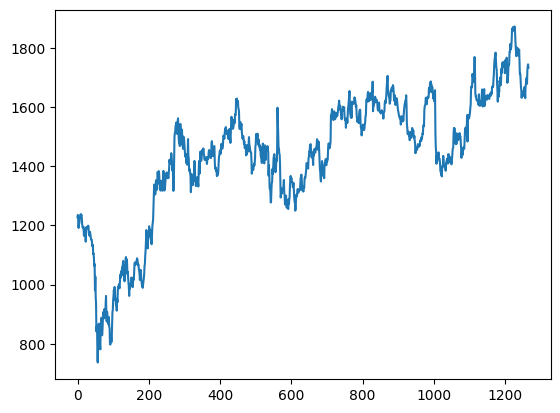

In [17]:
plt.plot(df)

In [18]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler
scaler=MinMaxScaler (feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [19]:
df

array([[0.43220319],
       [0.43909772],
       [0.42357439],
       ...,
       [0.88195896],
       [0.88729035],
       [0.87750869]])

In [20]:
training_size=int(len(df)*0.8)
test_size=len (df)-training_size
train_data, test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [21]:
training_size, test_size

(1012, 254)

In [22]:
# creating 60(or whatever you decided) batches
import numpy
# convert an array of values into a dataset matrix
def create_dataset (dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] ###i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [23]:
# reshape into X=t,t+1, t+2, t+3 and Y=t+4
time_step=60

X_train, y_train = create_dataset (train_data, time_step)
X_test, y_test = create_dataset (test_data, time_step)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [25]:
model=Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(time_step,1)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

d:\work\Anunay\MBA_Project\.env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,617 (967.25 KB)

 Trainable params: 247,617 (967.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)

In [28]:
from keras.models import load_model

In [ ]:
model.save('lstm_model.h5')
print("Model saved to disk")

In [29]:
model = load_model('Model/HDFCBK_Pred_model.h5')

In [30]:
import tensorflow as tf

In [31]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [32]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

1413.5524116149143

In [33]:
math.sqrt(mean_squared_error(y_test, test_predict))

1660.6927599781038

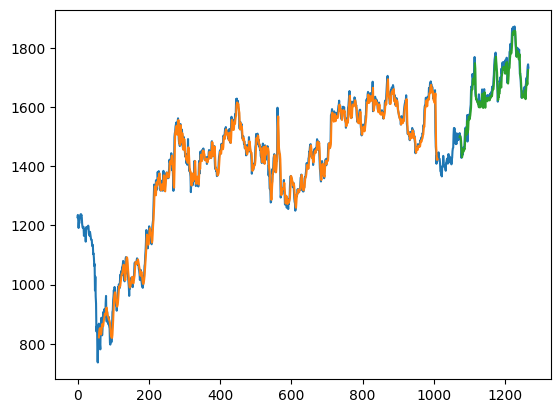

In [34]:
### Plotting
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot [look_back: len(train_predict) +look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()